<a href="https://colab.research.google.com/github/garvit968/LangchainTut/blob/main/Supervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

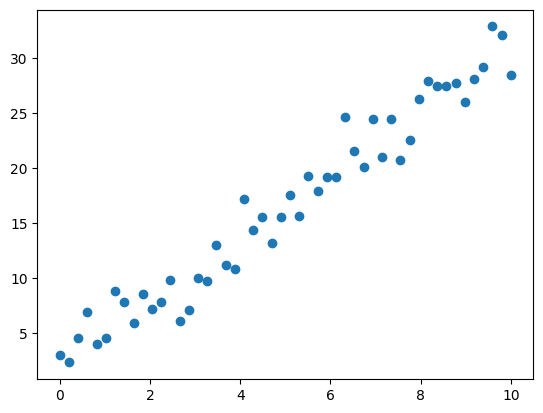

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.linspace(0,10,50).reshape(-1,1)
y = 3*X.flatten() + 2 + np.random.randn(50)*2
plt.scatter(X,y)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(lr.coef_)
print(lr.intercept_)
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.r2_score(y_test, y_pred))
print(metrics.root_mean_squared_error(y_test, y_pred))

[2.87835837]
2.298979814045529
1.5004781362672996
0.9520363333595955
1.8546017057837085


In [17]:
n,p = X_test.shape
adjusted_r2 = 1-(1-metrics.r2_score(y_test, y_pred)*(n-1)/n-p-1)
print(adjusted_r2)

2.888567244468956


In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
lr_simple = LogisticRegression(max_iter=10000)
lr_simple.fit(X_train, y_train)
y_pred_simple = lr_simple.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_simple))

lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=10000)
lr_l1.fit(X_train, y_train)
y_pred_l1 = lr_l1.predict(X_test)
print(metrics.accuracy_score(y_pred_l1, y_test))

lr_l2 = LogisticRegression(penalty='l2', C=1.0, max_iter=10000)
lr_l2.fit(X_train, y_train)
y_pred_l2 = lr_l2.predict(X_test)
print(metrics.accuracy_score(y_pred_l2, y_test))

lr_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0, max_iter=10000)
lr_en.fit(X_train, y_train)
y_pred_en = lr_en.predict(X_test)
print(metrics.accuracy_score(y_pred_en, y_test))

0.956140350877193
0.956140350877193
0.956140350877193
0.9736842105263158


In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

data = load_breast_cancer()
X,y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
Confusion Matrix:
 [[39  4]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
## Detect Overfitting
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42, max_depth=None)  # full depth
dt.fit(X_train, y_train)

train_acc = accuracy_score(y_train, dt.predict(X_train))
test_acc = accuracy_score(y_test, dt.predict(X_test))

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)



# ✅ How to Fix It

# Limit complexity: max_depth, min_samples_split, min_samples_leaf

# Use pruning (ccp_alpha)

# Use cross-validation to tune parameters

# Prefer ensemble methods (Random Forest, XGBoost) which reduce overfitting by averaging multiple trees

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

X,y = load_iris(return_X_y=True)
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42, test_size=0.2)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
dt_acc = metrics.accuracy_score(y_test, dt.predict(X_test))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
gb_acc = accuracy_score(y_test, gb.predict(X_test))

# XG Boost
xgb = XGBClassifier(n_estimators=100, learning_rate = 0.1, use_label_encoder = False)
xgb.fit(X_train, y_train)
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

# LightGBM
lgbm = LGBMClassifier(n_estimators=100, learning_rate = 0.1, max_depth = -1)
lgbm.fit(X_train, y_train)
lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))


print("Decision Tree Accuracy:", dt_acc)
print("Random Forest Accuracy:", rf_acc)
print("Gradient Boosting Accuracy:", gb_acc)
print("XGB Accuracy:", xgb_acc)
print("LGBM Accuracy:", lgbm_acc)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:57:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.073920
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
